In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("1603428153-5e748a2d5fc288e9f69c5f86.csv")
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [3]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [4]:
#Question:In the English Premier League, May - July represents a lull period due to the lack of club football. 
#What makes up for it, is the intense transfer speculation that surrounds all major player transfers today. 
#An important part of negotiations is predicting the fair market price for a player.
#You are tasked with predicting this Market Value of a player using the data provided below

#Lets Check the columns 
#name: Name of the Player
#club: club of the player
#age: Age of the player
#Position: The usual Position on the pitch
#Position_cat
        # 1: for attacker
        # 2: for midfielders
        # 3: for defenders
        # 4: for goalkeepers
# Market_Value: As on transfermrkt.com on July 20th, 2017---------------------------------we have to predict the market value
# page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017
# fpl_value : Value in Fantasy Premier League as on July 20th, 2017
# fpl_sel : % of FPL players who have selected that player in their team
# fpl_points : FPL points accumulated over the previous season
# region: 
       #1 for England

       #2 for EU

       #3 for Americas

       #4 for Rest of World

#nationality
#new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)
#age_cat
#club_id
#big_club: Whether one of the Top 6 clubs
#new_signing: Whether a new signing for 2017/18 (till 20th July)



In [5]:
data.isnull().sum()
# We can clearly see that this data has null value in region coloum

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

#  Data Preprocessing & EDA

In [6]:
data.describe(include='all')

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
count,461,461,461.000000,461,461.000000,461.000000,461.000000,461.000000,461,461.000000,460.000000,461,461.000000,461.000000,461.000000,461.000000,461.000000
unique,461,20,NaN,13,NaN,NaN,NaN,NaN,113,NaN,NaN,61,NaN,NaN,NaN,NaN,NaN
top,Shinji Okazaki,Everton,NaN,CB,NaN,NaN,NaN,NaN,0.10%,NaN,NaN,England,NaN,NaN,NaN,NaN,NaN
freq,1,28,NaN,85,NaN,NaN,NaN,NaN,64,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,26.804772,NaN,2.180043,11.012039,763.776573,5.447939,NaN,57.314534,1.993478,NaN,0.034707,3.206074,10.334056,0.303688,0.145336
std,NaN,NaN,3.961892,NaN,1.000061,12.257403,931.805757,1.346695,NaN,53.113811,0.957689,NaN,0.183236,1.279795,5.726475,0.460349,0.352822
min,NaN,NaN,17.000000,NaN,1.000000,0.050000,3.000000,4.000000,NaN,0.000000,1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,24.000000,NaN,1.000000,3.000000,220.000000,4.500000,NaN,5.000000,1.000000,NaN,0.000000,2.000000,6.000000,0.000000,0.000000
50%,NaN,NaN,27.000000,NaN,2.000000,7.000000,460.000000,5.000000,NaN,51.000000,2.000000,NaN,0.000000,3.000000,10.000000,0.000000,0.000000
75%,NaN,NaN,30.000000,NaN,3.000000,15.000000,896.000000,5.500000,NaN,94.000000,2.000000,NaN,0.000000,4.000000,15.000000,1.000000,0.000000


In [7]:
data=data.dropna(axis=0)
data.describe(include='all')

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
count,460,460,460.000000,460,460.000000,460.000000,460.000000,460.000000,460,460.00000,460.000000,460,460.000000,460.000000,460.000000,460.000000,460.000000
unique,460,20,NaN,13,NaN,NaN,NaN,NaN,113,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN
top,Shinji Okazaki,Everton,NaN,CB,NaN,NaN,NaN,NaN,0.10%,NaN,NaN,England,NaN,NaN,NaN,NaN,NaN
freq,1,28,NaN,85,NaN,NaN,NaN,NaN,64,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,26.815217,NaN,2.182609,11.024022,765.315217,5.446739,NaN,57.43913,1.993478,NaN,0.034783,3.208696,10.339130,0.304348,0.145652
std,NaN,NaN,3.959846,NaN,0.999631,12.268045,932.233794,1.347915,NaN,53.10415,0.957689,NaN,0.183428,1.279949,5.731672,0.460632,0.353141
min,NaN,NaN,17.000000,NaN,1.000000,0.050000,3.000000,4.000000,NaN,0.00000,1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,24.000000,NaN,1.000000,3.000000,220.750000,4.500000,NaN,5.00000,1.000000,NaN,0.000000,2.000000,6.000000,0.000000,0.000000
50%,NaN,NaN,27.000000,NaN,2.000000,7.000000,460.000000,5.000000,NaN,51.00000,2.000000,NaN,0.000000,3.000000,10.000000,0.000000,0.000000
75%,NaN,NaN,30.000000,NaN,3.000000,15.000000,900.000000,5.500000,NaN,94.00000,2.000000,NaN,0.000000,4.000000,15.000000,1.000000,0.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 460
Data columns (total 17 columns):
name            460 non-null object
club            460 non-null object
age             460 non-null int64
position        460 non-null object
position_cat    460 non-null int64
market_value    460 non-null float64
page_views      460 non-null int64
fpl_value       460 non-null float64
fpl_sel         460 non-null object
fpl_points      460 non-null int64
region          460 non-null float64
nationality     460 non-null object
new_foreign     460 non-null int64
age_cat         460 non-null int64
club_id         460 non-null int64
big_club        460 non-null int64
new_signing     460 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 64.7+ KB


In [9]:
data['fpl_sel'] = data['fpl_sel'].apply(lambda x: float(x[:-1]))
data['fpl_sel']
#We have to convert the object to float value

0      17.1
1       5.6
2       5.9
3       1.5
4       0.7
5      13.7
6       2.5
7       4.7
8       4.0
9       1.0
10      2.0
11      1.8
12      0.0
13      5.1
14      1.7
15      0.1
16      0.5
17      0.1
18      0.5
19      1.7
20      0.8
21      0.1
22      4.2
23      0.2
24      0.4
25      1.0
26      6.9
27     26.5
28     10.4
29     15.0
30     19.8
31      6.9
32      2.0
33      0.6
34      0.9
35      1.6
36      4.0
37      0.7
38      0.9
39      0.1
40      0.2
41     11.5
42      0.1
43      1.1
44      0.4
45      0.8
46      0.1
47      1.5
48      0.1
49      0.4
50      3.3
51      9.3
52      2.1
53      1.5
54      4.1
55      0.6
56      8.0
57      0.4
58      0.2
59      3.2
60      0.8
61      0.2
62      4.8
63      0.9
64      0.3
65      0.6
66      0.2
67      0.1
68      0.2
69      0.1
70      0.3
71      1.3
72      0.4
73      0.2
74     13.5
75      2.9
76      1.7
77     13.7
78      2.5
79      1.2
80      1.2
81      0.2
82      0.1
83  

In [10]:
data.info()
# Now we can do further analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 460
Data columns (total 17 columns):
name            460 non-null object
club            460 non-null object
age             460 non-null int64
position        460 non-null object
position_cat    460 non-null int64
market_value    460 non-null float64
page_views      460 non-null int64
fpl_value       460 non-null float64
fpl_sel         460 non-null float64
fpl_points      460 non-null int64
region          460 non-null float64
nationality     460 non-null object
new_foreign     460 non-null int64
age_cat         460 non-null int64
club_id         460 non-null int64
big_club        460 non-null int64
new_signing     460 non-null int64
dtypes: float64(4), int64(9), object(4)
memory usage: 64.7+ KB


In [11]:
#name-----------------------------------remove           
#club---------------------barplot-------remove            
#age----------------------displot------------------ can be important feature....................................ok
#position-----------------barplot-------remove        
#position_cat-------------barplot------------------ can be important feature.............onehot encoding--------ok 
#market_value-------------displot-------------------output-----------------------have to remove outliers--------ok
#page_views---------------displot ------------------can be important feature --- have to remove outliers--------ok  
#fpl_value----------------displot-------------------can be important feature---- have to remove outliers--------ok     
#fpl_sel------------------displot-------------------can be important feature-----have to remove outliers--------ok
#fpl_points---------------displot-------------------cab be important feature-----have to remove outliers........ok     
#region ------------------barplot-------------------can be important features------------onehot enconding ------ok     
#nationality--------------barplot--------remove     
#new_foreign--------------countplot------remove------no effect on output
#age_cat------------------countplot=------------can be important feature------------onehot encoding---------     ok
#club_id------------------countplot------remove     
#big_club-----------------countplot------------------can be important feature
#new_signing--------------countplot------------------can be importnat feature------------------------------------ok



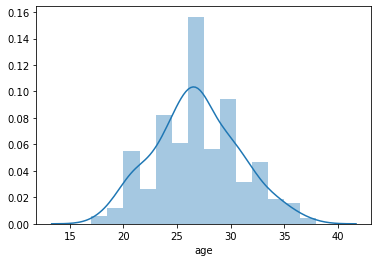

In [12]:
sns.distplot(data['age'])
plt.show()
#Lets draw problity distribution function
#The Pdf will show us how that varibale is distributed

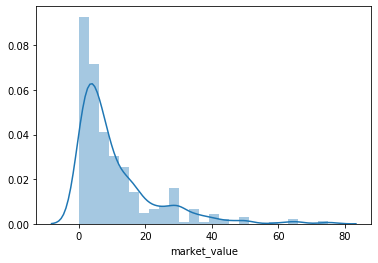

In [13]:
sns.distplot(data['market_value'])
plt.show()
#obviously there are some outliers present in it so we have to remove these outlier because it will create problem for the model.
#we can see that the outlier are situated around the higher prices.

In [14]:
data.describe(include='all')

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
count,460,460,460.000000,460,460.000000,460.000000,460.000000,460.000000,460.000000,460.00000,460.000000,460,460.000000,460.000000,460.000000,460.000000,460.000000
unique,460,20,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN
top,Shinji Okazaki,Everton,NaN,CB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,NaN,NaN,NaN,NaN,NaN
freq,1,28,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,26.815217,NaN,2.182609,11.024022,765.315217,5.446739,3.250000,57.43913,1.993478,NaN,0.034783,3.208696,10.339130,0.304348,0.145652
std,NaN,NaN,3.959846,NaN,0.999631,12.268045,932.233794,1.347915,5.680493,53.10415,0.957689,NaN,0.183428,1.279949,5.731672,0.460632,0.353141
min,NaN,NaN,17.000000,NaN,1.000000,0.050000,3.000000,4.000000,0.000000,0.00000,1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,24.000000,NaN,1.000000,3.000000,220.750000,4.500000,0.200000,5.00000,1.000000,NaN,0.000000,2.000000,6.000000,0.000000,0.000000
50%,NaN,NaN,27.000000,NaN,2.000000,7.000000,460.000000,5.000000,1.000000,51.00000,2.000000,NaN,0.000000,3.000000,10.000000,0.000000,0.000000
75%,NaN,NaN,30.000000,NaN,3.000000,15.000000,900.000000,5.500000,3.300000,94.00000,2.000000,NaN,0.000000,4.000000,15.000000,1.000000,0.000000


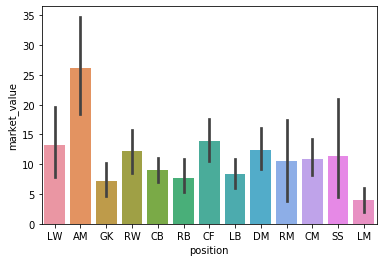

In [15]:
sns.barplot('position','market_value',data=data)
plt.show()

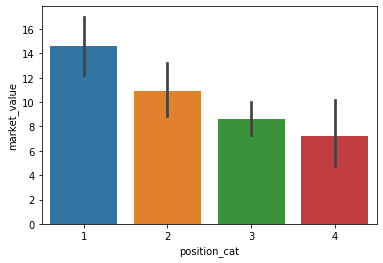

In [16]:
sns.barplot('position_cat','market_value',data=data)
plt.show()

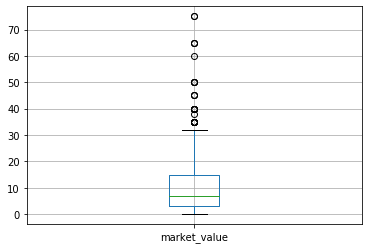

In [17]:
data.boxplot('market_value')


In [18]:
data['market_value'].value_counts()

5.00     41
15.00    28
10.00    23
7.00     22
8.00     22
1.50     21
1.00     21
6.00     20
2.50     17
2.00     17
3.00     16
30.00    16
12.00    16
4.00     15
0.50     14
18.00    14
9.00     12
0.25     11
3.50     11
25.00    11
35.00     9
22.00     8
4.50      8
0.75      6
40.00     6
20.00     6
28.00     6
13.00     5
5.50      4
17.00     4
50.00     4
65.00     3
45.00     3
11.00     3
75.00     2
16.00     2
14.00     2
0.05      1
1.25      1
1.75      1
32.00     1
38.00     1
21.00     1
7.50      1
60.00     1
24.00     1
0.65      1
0.10      1
Name: market_value, dtype: int64

In [19]:
#have to remove the outliers


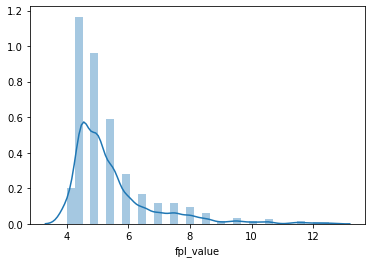

In [20]:
sns.distplot(data['fpl_value'])
plt.show()
##obviously there are some outliers present in it so we have to remove these outlier because it will create problem for the model.
#we can see that the outlier are situated around the higher side.

In [21]:
# we have to remove some value
q=data['fpl_value'].quantile(.99)
q

10.5

In [22]:
data=data[data['fpl_value']<q]

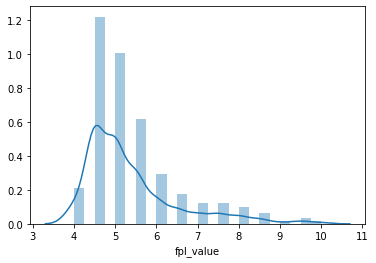

In [23]:
sns.distplot(data['fpl_value'])
plt.show()

In [24]:
data.describe(include='all')

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
count,453,453,453.000000,453,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453,453.000000,453.000000,453.000000,453.000000,453.000000
unique,453,20,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN
top,Shinji Okazaki,Everton,NaN,CB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,NaN,NaN,NaN,NaN,NaN
freq,1,28,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,26.841060,NaN,2.200883,10.344481,719.922737,5.356512,2.967108,55.732892,1.988962,NaN,0.033113,3.216336,10.370861,0.293598,0.145695
std,NaN,NaN,3.969061,NaN,0.996365,10.913514,854.348391,1.140247,4.955461,50.461776,0.960440,NaN,0.179128,1.281936,5.727533,0.455914,0.353191
min,NaN,NaN,17.000000,NaN,1.000000,0.050000,3.000000,4.000000,0.000000,0.000000,1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,24.000000,NaN,1.000000,3.000000,219.000000,4.500000,0.200000,5.000000,1.000000,NaN,0.000000,2.000000,6.000000,0.000000,0.000000
50%,NaN,NaN,27.000000,NaN,2.000000,6.000000,458.000000,5.000000,0.900000,50.000000,2.000000,NaN,0.000000,3.000000,10.000000,0.000000,0.000000
75%,NaN,NaN,30.000000,NaN,3.000000,15.000000,867.000000,5.500000,3.200000,93.000000,2.000000,NaN,0.000000,4.000000,15.000000,1.000000,0.000000


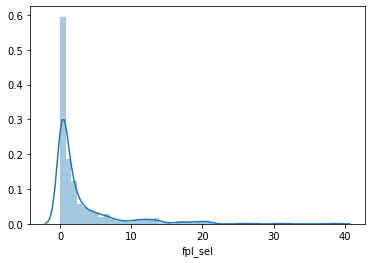

In [25]:
sns.distplot(data['fpl_sel'])
plt.show()
##obviously there are some outliers present in it so we have to remove these outlier because it will create problem for the model.
#we can see that the outlier are situated around the higher side.

In [26]:
# we have to remove some value
q=data['fpl_sel'].quantile(.98)
q

19.471999999999987

In [27]:
data=data[data['fpl_sel']<q]

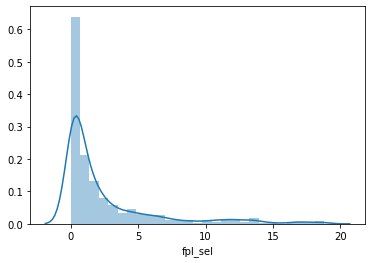

In [28]:
sns.distplot(data['fpl_sel'])
plt.show()

In [29]:
data.describe(include='all')

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
count,443,443,443.000000,443,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443,443.000000,443.000000,443.000000,443.000000,443.000000
unique,443,20,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN
top,Nordin Amrabat,Everton,NaN,CB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,NaN,NaN,NaN,NaN,NaN
freq,1,27,NaN,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,26.837472,NaN,2.200903,9.871445,663.650113,5.318284,2.497065,53.760722,1.986456,NaN,0.033860,3.216704,10.379233,0.286682,0.146727
std,NaN,NaN,3.972273,NaN,0.992186,10.084350,681.629122,1.096190,3.777471,48.915354,0.958315,NaN,0.181073,1.280904,5.742256,0.452723,0.354233
min,NaN,NaN,17.000000,NaN,1.000000,0.050000,3.000000,4.000000,0.000000,0.000000,1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,24.000000,NaN,1.000000,2.500000,217.500000,4.500000,0.200000,4.000000,1.000000,NaN,0.000000,2.000000,6.000000,0.000000,0.000000
50%,NaN,NaN,27.000000,NaN,2.000000,6.000000,454.000000,5.000000,0.900000,47.000000,2.000000,NaN,0.000000,3.000000,10.000000,0.000000,0.000000
75%,NaN,NaN,30.000000,NaN,3.000000,15.000000,847.500000,5.500000,2.900000,90.000000,2.000000,NaN,0.000000,4.000000,15.000000,1.000000,0.000000


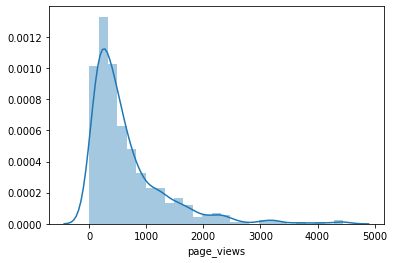

In [30]:
sns.distplot(data['page_views'])
plt.show()
#obviously there are some outliers present in it so we have to remove these outlier because it will create problem for the model.
#we can see that the outlier are situated around the higher side.

In [31]:
q=data['page_views'].quantile(.99)
q

3272.9399999999987

In [32]:
data=data[data['page_views']<q]

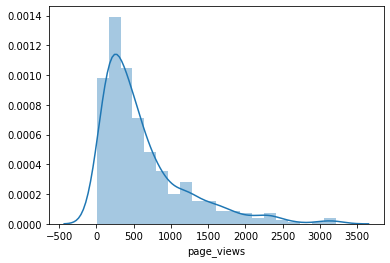

In [33]:
sns.distplot(data['page_views'])
plt.show()

In [34]:
data.describe(include='all')

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
count,438,438,438.000000,438,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438,438.000000,438.000000,438.000000,438.000000,438.000000
unique,438,20,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN,NaN,NaN,NaN
top,Nordin Amrabat,Everton,NaN,CB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,NaN,NaN,NaN,NaN,NaN
freq,1,27,NaN,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,26.849315,NaN,2.212329,9.520662,625.858447,5.287671,2.453196,53.015982,1.984018,NaN,0.034247,3.216895,10.417808,0.278539,0.143836
std,NaN,NaN,3.975916,NaN,0.991097,9.491232,583.904766,1.047230,3.754244,48.373094,0.957791,NaN,0.182070,1.282156,5.744870,0.448793,0.351324
min,NaN,NaN,17.000000,NaN,1.000000,0.050000,3.000000,4.000000,0.000000,0.000000,1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,24.000000,NaN,1.000000,2.500000,216.250000,4.500000,0.200000,4.000000,1.000000,NaN,0.000000,2.000000,6.000000,0.000000,0.000000
50%,NaN,NaN,27.000000,NaN,2.000000,6.000000,443.500000,5.000000,0.800000,46.500000,2.000000,NaN,0.000000,3.000000,10.000000,0.000000,0.000000
75%,NaN,NaN,30.000000,NaN,3.000000,13.000000,839.250000,5.500000,2.700000,90.000000,2.000000,NaN,0.000000,4.000000,15.000000,1.000000,0.000000


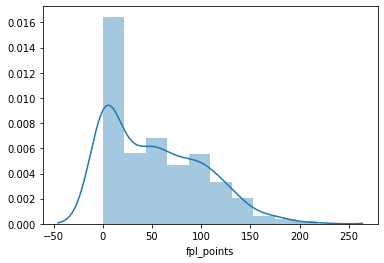

In [35]:
sns.distplot(data['fpl_points'])
plt.show()

In [36]:
q=data['fpl_points'].quantile(.98)
q

163.03999999999996

In [37]:
data=data[data['fpl_points']<q]

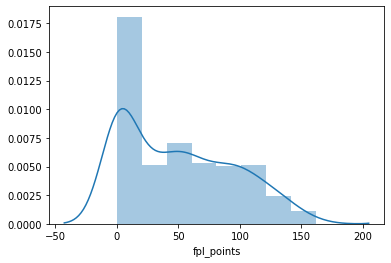

In [38]:
sns.distplot(data['fpl_points'])
plt.show()

In [39]:
data.describe(include='all')

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
count,429,429,429.000000,429,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429,429.000000,429.000000,429.000000,429.000000,429.000000
unique,429,20,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN
top,Nordin Amrabat,Everton,NaN,CB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,NaN,NaN,NaN,NaN,NaN
freq,1,27,NaN,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,26.839161,NaN,2.223776,9.151632,601.701632,5.231935,2.267133,50.303030,1.983683,NaN,0.034965,3.212121,10.449883,0.270396,0.144522
std,NaN,NaN,3.994126,NaN,0.988860,8.902163,550.844822,0.969358,3.512151,45.002352,0.960536,NaN,0.183906,1.287700,5.734421,0.444683,0.352029
min,NaN,NaN,17.000000,NaN,1.000000,0.050000,3.000000,4.000000,0.000000,0.000000,1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,24.000000,NaN,1.000000,2.500000,215.000000,4.500000,0.200000,3.000000,1.000000,NaN,0.000000,2.000000,6.000000,0.000000,0.000000
50%,NaN,NaN,27.000000,NaN,2.000000,6.000000,432.000000,5.000000,0.800000,45.000000,2.000000,NaN,0.000000,3.000000,10.000000,0.000000,0.000000
75%,NaN,NaN,30.000000,NaN,3.000000,12.000000,764.000000,5.500000,2.500000,88.000000,2.000000,NaN,0.000000,4.000000,15.000000,1.000000,0.000000


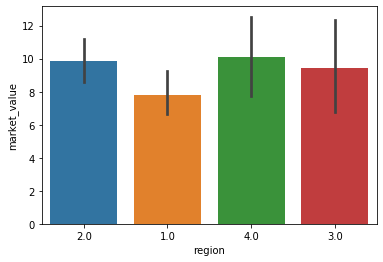

In [40]:
sns.barplot('region','market_value',data=data,order = data['region'].value_counts().index)
plt.show()

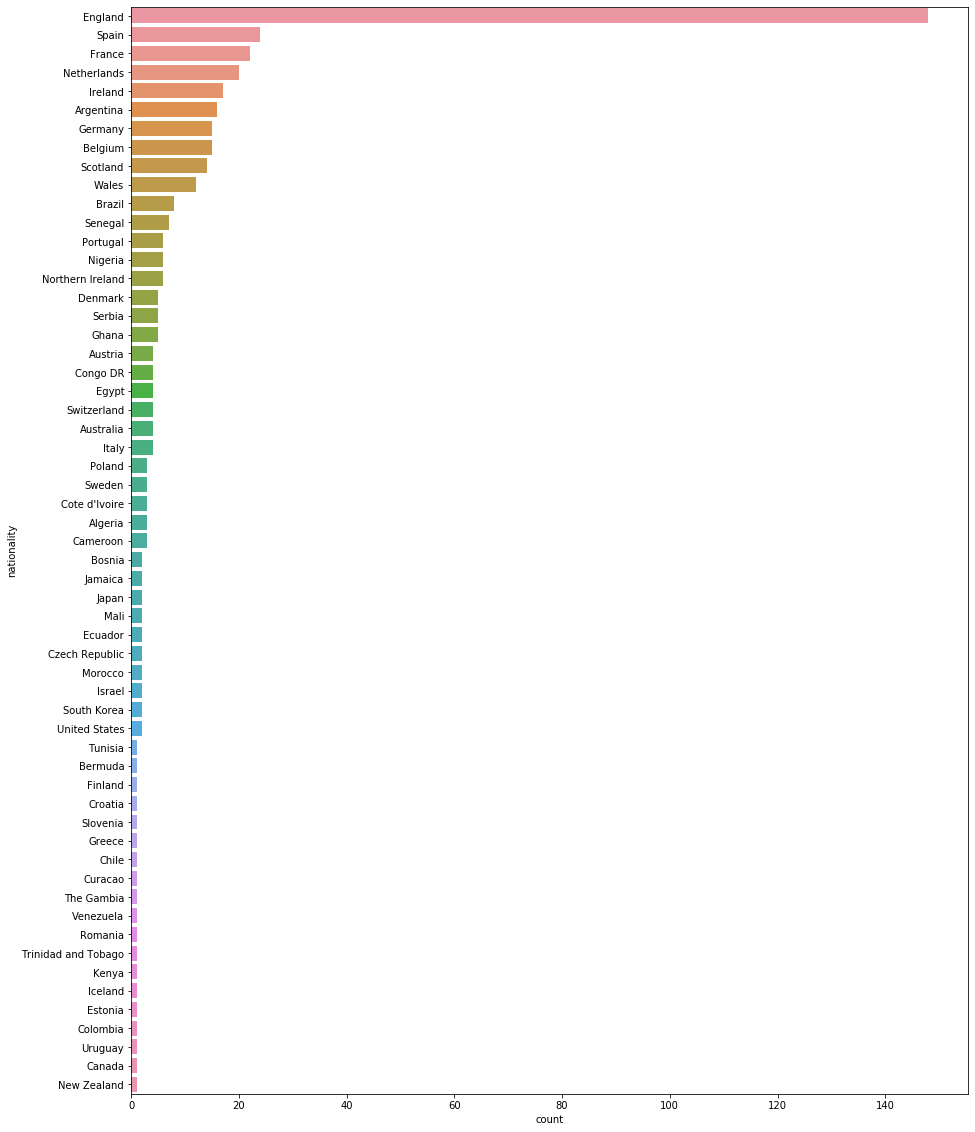

In [41]:
plt.figure(figsize=(15,20))
sns.countplot(data = data, y = 'nationality',order = data['nationality'].value_counts().index)
# England-highest number of players

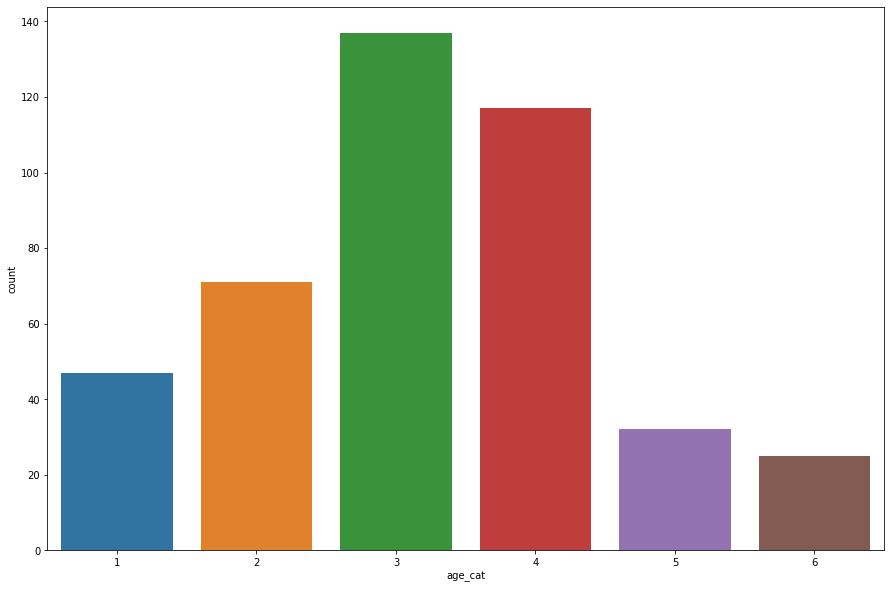

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(data['age_cat'])


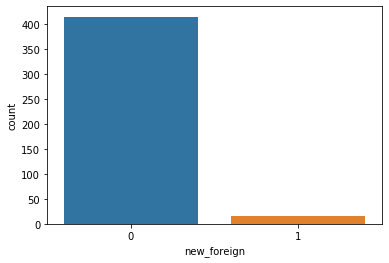

In [43]:
sns.countplot(data['new_foreign'])
plt.show()

In [44]:
data['new_foreign'].value_counts()
#we can drop this columns because it will not impact the output

0    414
1     15
Name: new_foreign, dtype: int64

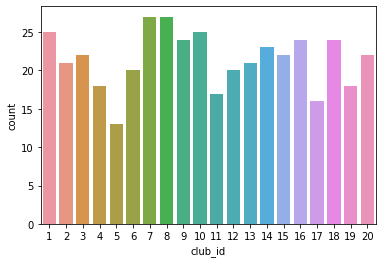

In [45]:
sns.countplot(data['club_id'])
plt.show()

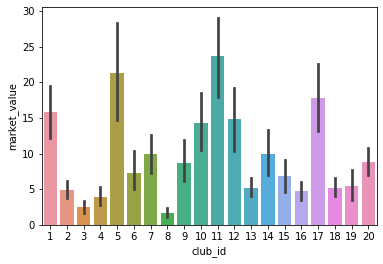

In [46]:
sns.barplot('club_id','market_value',data=data)
plt.show()

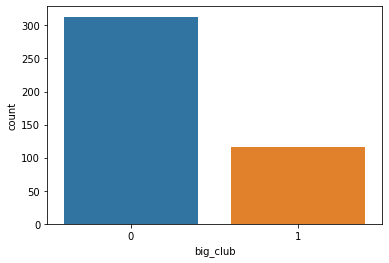

In [47]:
sns.countplot(data['big_club'])
plt.show()

In [48]:
data['big_club'].value_counts()

0    313
1    116
Name: big_club, dtype: int64

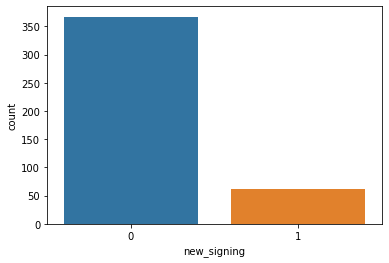

In [49]:
sns.countplot(data['new_signing'])
plt.show()

In [50]:
data['new_signing'].value_counts()


0    367
1     62
Name: new_signing, dtype: int64

In [51]:
data.columns

Index(['name', 'club', 'age', 'position', 'position_cat', 'market_value',
       'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region',
       'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing'],
      dtype='object')

In [52]:
#name-----------------------------------remove           
#club---------------------barplot-------remove            
#age----------------------displot------------------ can be important feature....................................ok
#position-----------------barplot-------remove        
#position_cat-------------barplot------------------ can be important feature.............onehot encoding--------ok 
#market_value-------------displot-------------------output-----------------------have to take log---------------ok
#page_views---------------displot ------------------can be important feature --- have to remove outliers--------ok  
#fpl_value----------------displot-------------------can be important feature---- have to remove outliers--------ok     
#fpl_sel------------------displot-------------------can be important feature-----have to remove outliers--------ok
#fpl_points---------------displot-------------------cab be important feature-----have to remove outliers........ok     
#region ------------------barplot-------------------can be important features------------onehot enconding ------ok     
#nationality--------------barplot--------remove     
#new_foreign--------------countplot------remove------no effect on output
#age_cat------------------countplot=-----remove......can be remove beacase it is same like age -----------    ok
#club_id------------------countplot------remove     
#big_club-----------------countplot------------------can be important feature
#new_signing--------------countplot------------------can be importnat feature------------------------------------ok


In [53]:
data=data[['age','position_cat', 'page_views',
       'fpl_value', 'fpl_sel', 'fpl_points', 'region', 
       'big_club', 'new_signing',
       'market_value']]

In [54]:
column_names = data.columns
column_names

Index(['age', 'position_cat', 'page_views', 'fpl_value', 'fpl_sel',
       'fpl_points', 'region', 'big_club', 'new_signing', 'market_value'],
      dtype='object')

In [55]:
data.describe(include='all')

,age,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,big_club,new_signing,market_value
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,26.839161,2.223776,601.701632,5.231935,2.267133,50.303030,1.983683,0.270396,0.144522,9.151632
std,3.994126,0.988860,550.844822,0.969358,3.512151,45.002352,0.960536,0.444683,0.352029,8.902163
min,17.000000,1.000000,3.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.050000
25%,24.000000,1.000000,215.000000,4.500000,0.200000,3.000000,1.000000,0.000000,0.000000,2.500000
50%,27.000000,2.000000,432.000000,5.000000,0.800000,45.000000,2.000000,0.000000,0.000000,6.000000
75%,30.000000,3.000000,764.000000,5.500000,2.500000,88.000000,2.000000,1.000000,0.000000,12.000000
max,38.000000,4.000000,3219.000000,9.500000,18.800000,162.000000,4.000000,1.000000,1.000000,45.000000


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(data[data.columns[~data.columns.isin(['market_value'])]])
Y=data[['market_value']]
data_scaled = pd.DataFrame(np.concatenate((X,Y),axis = 1),columns = column_names)
data_scaled.head()

,age,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,big_club,new_signing,market_value
0,0.857143,1.000000,0.474502,0.272727,0.313830,0.827160,0.333333,1.0,0.0,7.0
1,0.523810,0.000000,0.743159,0.636364,0.079787,0.753086,0.000000,1.0,0.0,20.0
2,0.666667,0.666667,0.282649,0.363636,0.037234,0.746914,0.333333,1.0,0.0,22.0
3,0.238095,0.666667,0.519900,0.363636,0.728723,0.734568,0.333333,1.0,0.0,30.0
4,0.619048,0.000000,0.692475,0.818182,0.132979,0.716049,0.333333,1.0,0.0,22.0


In [57]:
data_scaled.describe(include='all')

,age,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,big_club,new_signing,market_value
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,0.468531,0.407925,0.186163,0.223988,0.120592,0.310513,0.327894,0.270396,0.144522,9.151632
std,0.190196,0.329620,0.171283,0.176247,0.186817,0.277792,0.320179,0.444683,0.352029,8.902163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000
25%,0.333333,0.000000,0.065920,0.090909,0.010638,0.018519,0.000000,0.000000,0.000000,2.500000
50%,0.476190,0.333333,0.133396,0.181818,0.042553,0.277778,0.333333,0.000000,0.000000,6.000000
75%,0.619048,0.666667,0.236629,0.272727,0.132979,0.543210,0.333333,1.000000,0.000000,12.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000


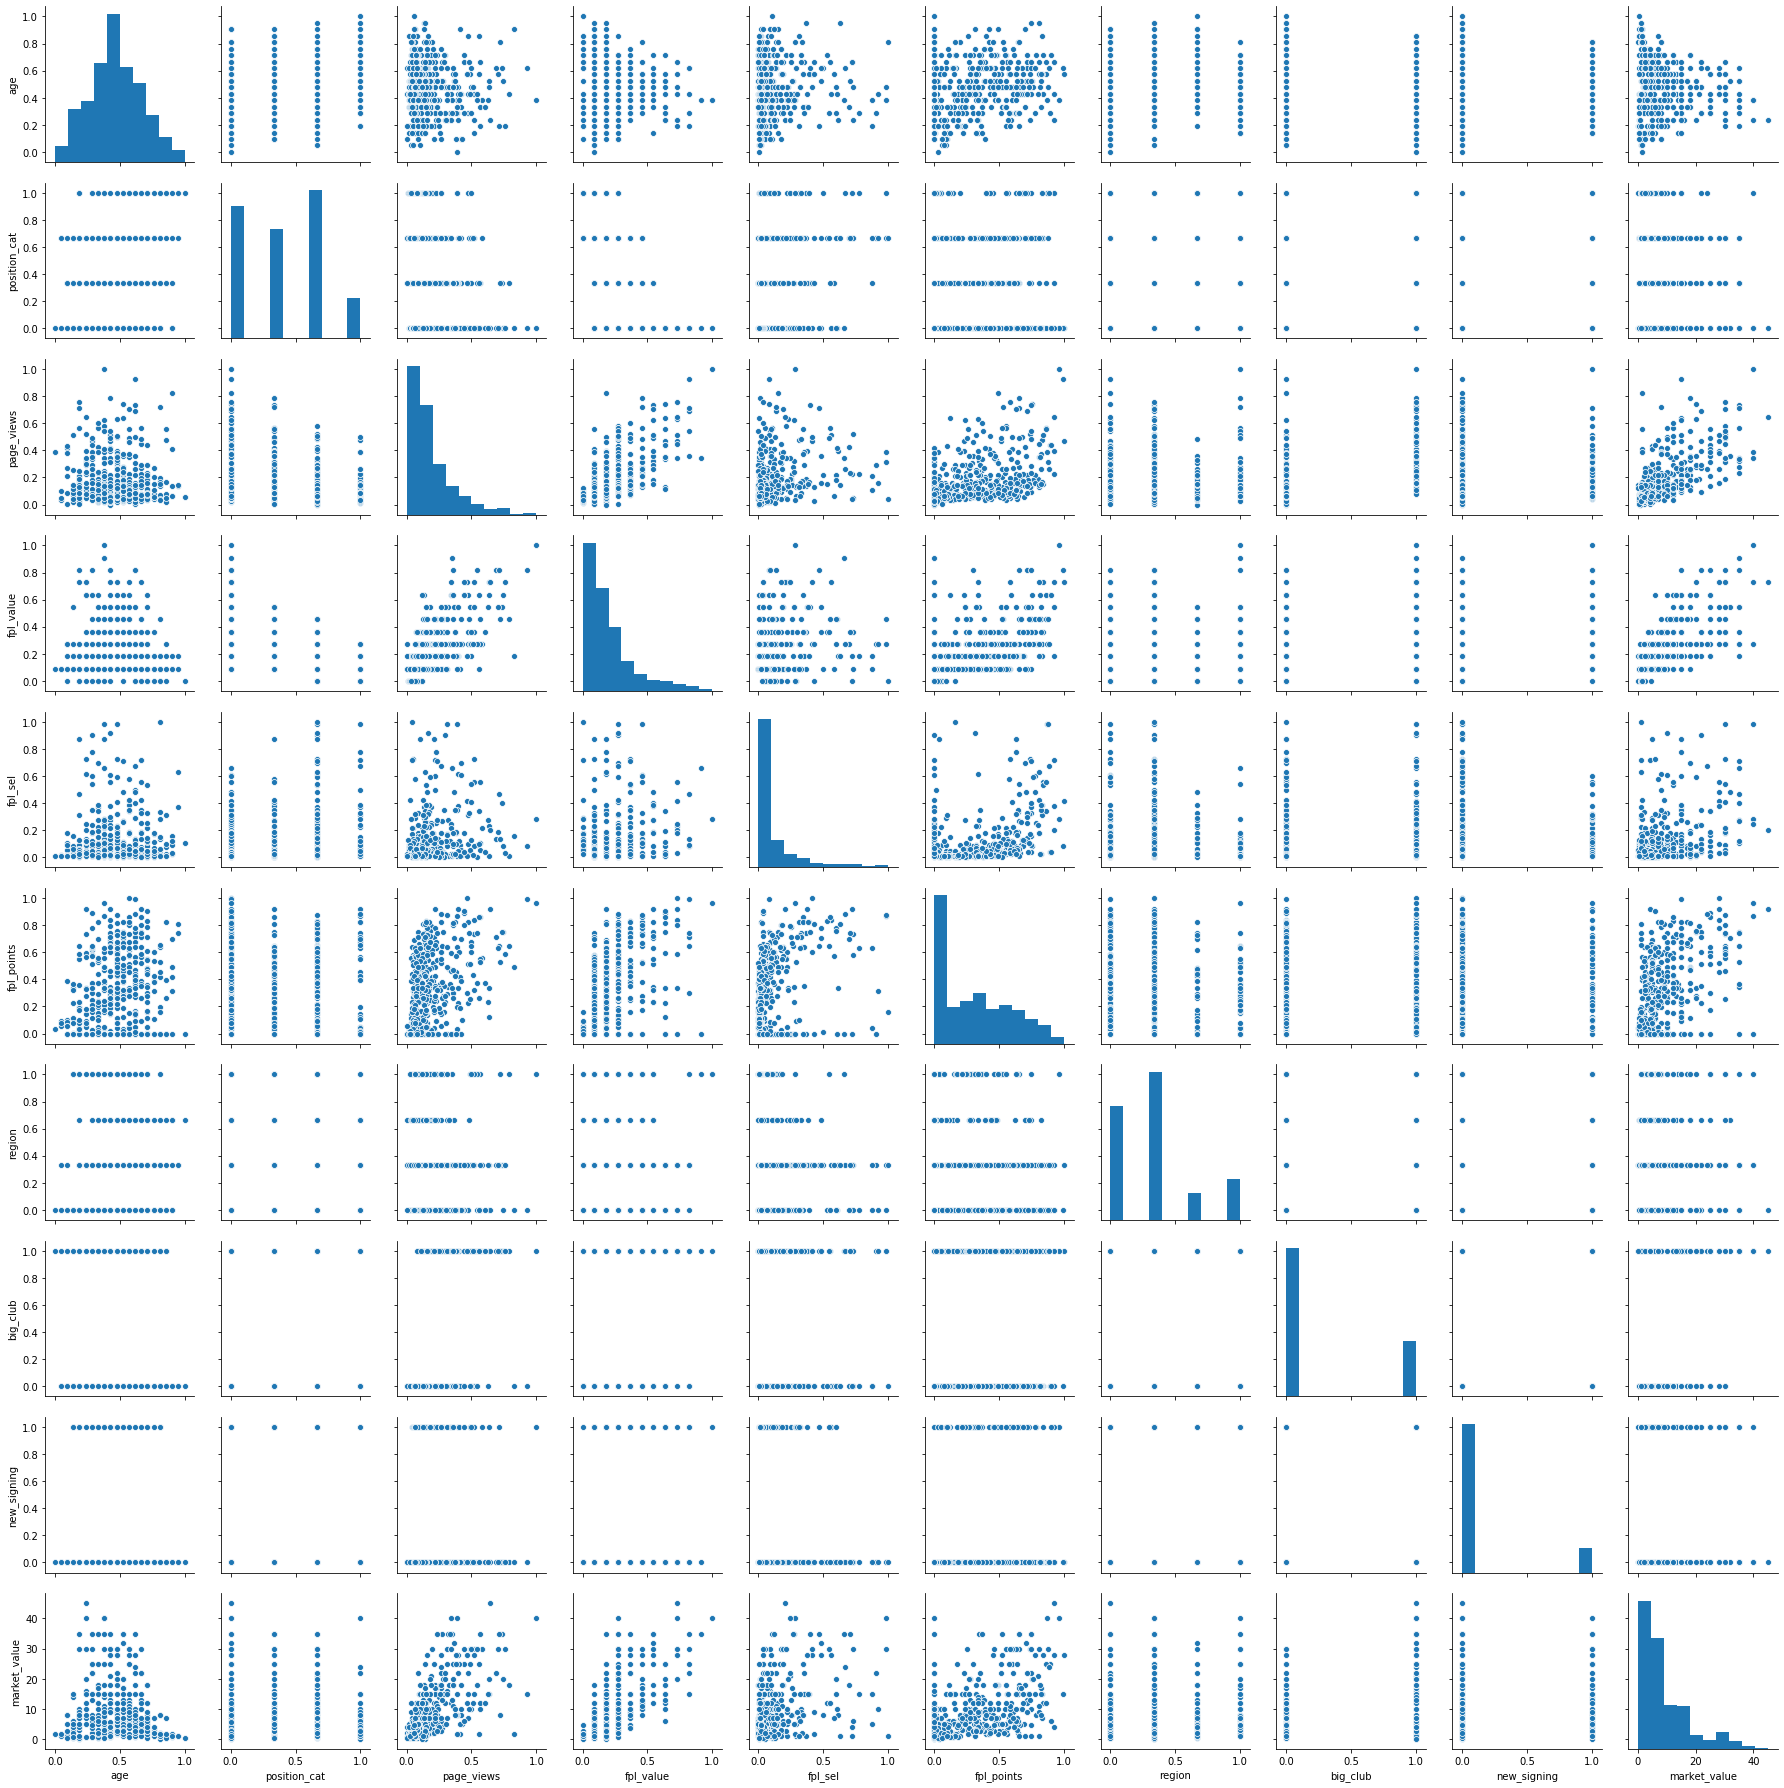

In [58]:
import seaborn as sns
sns.pairplot(data_scaled, height=2.5)

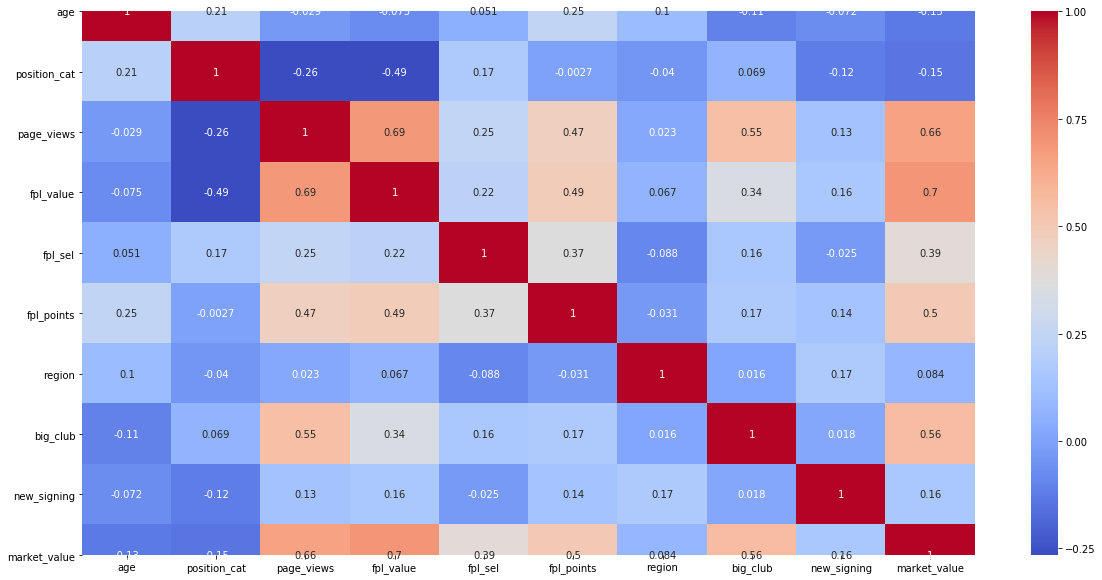

In [59]:
import seaborn as sns
import numpy as np

            
corr = data_scaled.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap='coolwarm', robust=True)    # fmt=".1f", square = True, , cbar=False

In [60]:
#Note1:Strong positive linear relationship between log_value,fpl value,page_view,fpl_points,big club
#Note2: Strong inverse linear relationship between log_value and Position_cat-4


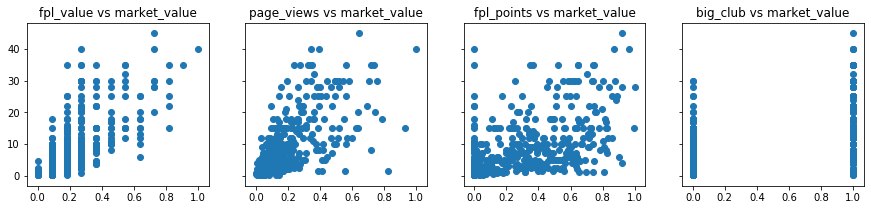

In [61]:
f, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax1.scatter(data_scaled['fpl_value'],data_scaled['market_value'])
ax1.set_title('fpl_value vs market_value')
ax2.scatter(data_scaled['page_views'],data_scaled['market_value'])
ax2.set_title('page_views vs market_value')
ax3.scatter(data_scaled['fpl_points'],data_scaled['market_value'])
ax3.set_title('fpl_points vs market_value')
ax4.scatter(data_scaled['big_club'],data_scaled['market_value'])
ax4.set_title('big_club vs market_value')

plt.show()

In [62]:
# This is the end of this EDA. Model building is in next sheet
data_scaled.head()

,age,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,big_club,new_signing,market_value
0,0.857143,1.000000,0.474502,0.272727,0.313830,0.827160,0.333333,1.0,0.0,7.0
1,0.523810,0.000000,0.743159,0.636364,0.079787,0.753086,0.000000,1.0,0.0,20.0
2,0.666667,0.666667,0.282649,0.363636,0.037234,0.746914,0.333333,1.0,0.0,22.0
3,0.238095,0.666667,0.519900,0.363636,0.728723,0.734568,0.333333,1.0,0.0,30.0
4,0.619048,0.000000,0.692475,0.818182,0.132979,0.716049,0.333333,1.0,0.0,22.0


In [63]:
data_scaled.to_csv('scaled_preprocessed.csv')
data.to_csv('data_preprocessed_Orginal.csv')